In [1]:
import linecache
import os
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4)

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version" % sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 1.2.0 version
Using seaborn 0.11.1 version
Using scipy 1.6.0 version


In [2]:
imfFull = "#548235"
imfTest = "#99C979"

knnFull = "#C55A11"
knnTest = "#ff5811"
normalizedKnnFull = "#4A76C6"
normalizedKnnTest = "#19C3FF"

average = "#FFC000"
popularity = "#F18F8F"
random = "#BFBFBF"

rec_colors_dict = {
    "iMF (full)": "#548235",
    "iMF (test)": "#99C979",
    "kNN (full/test)": "#C55A11",
    "kNN (full)": "#C55A11",
    "kNN (test)": "#ff5811",
    "Normalized kNN (full)": "#4A76C6",
    "Normalized kNN (test)": "#19C3FF",
    "Average Rating": "#FFC000",
    "Popularity": "#F18F8F",
    "Random": "#BFBFBF",
}
# colors = ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')
rec_colors = (
    imfFull,
    imfTest,
    knnFull,
    knnTest,
    normalizedKnnFull,
    normalizedKnnTest,
    average,
    popularity,
    random,
)

C:\Projects\RecSys2020\results\figure101.ml1m.txt
C:\Projects\RecSys2020\results\figure101.ml1m-male.txt
C:\Projects\RecSys2020\results\figure101.ml1m-female.txt
C:\Projects\RecSys2020\results\figure101.ml1m-young.txt
C:\Projects\RecSys2020\results\figure101.ml1m-old.txt
C:\Projects\RecSys2020\results\figure101.ml100k.txt
C:\Projects\RecSys2020\results\figure101.ml100k-male.txt
C:\Projects\RecSys2020\results\figure101.ml100k-female.txt
C:\Projects\RecSys2020\results\figure101.ml100k-young.txt
C:\Projects\RecSys2020\results\figure101.ml100k-old.txt


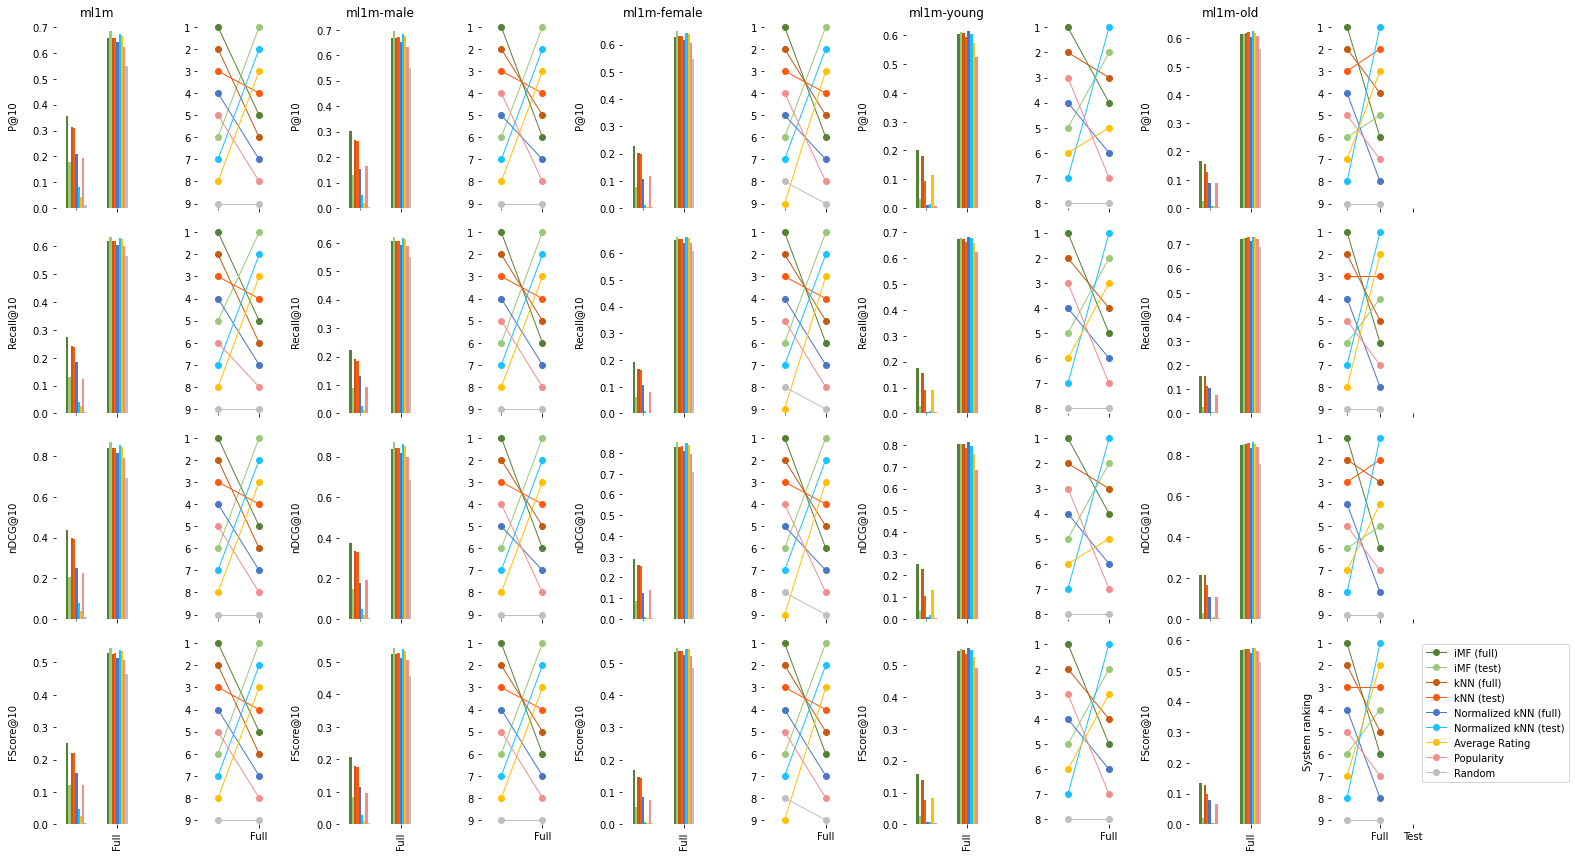

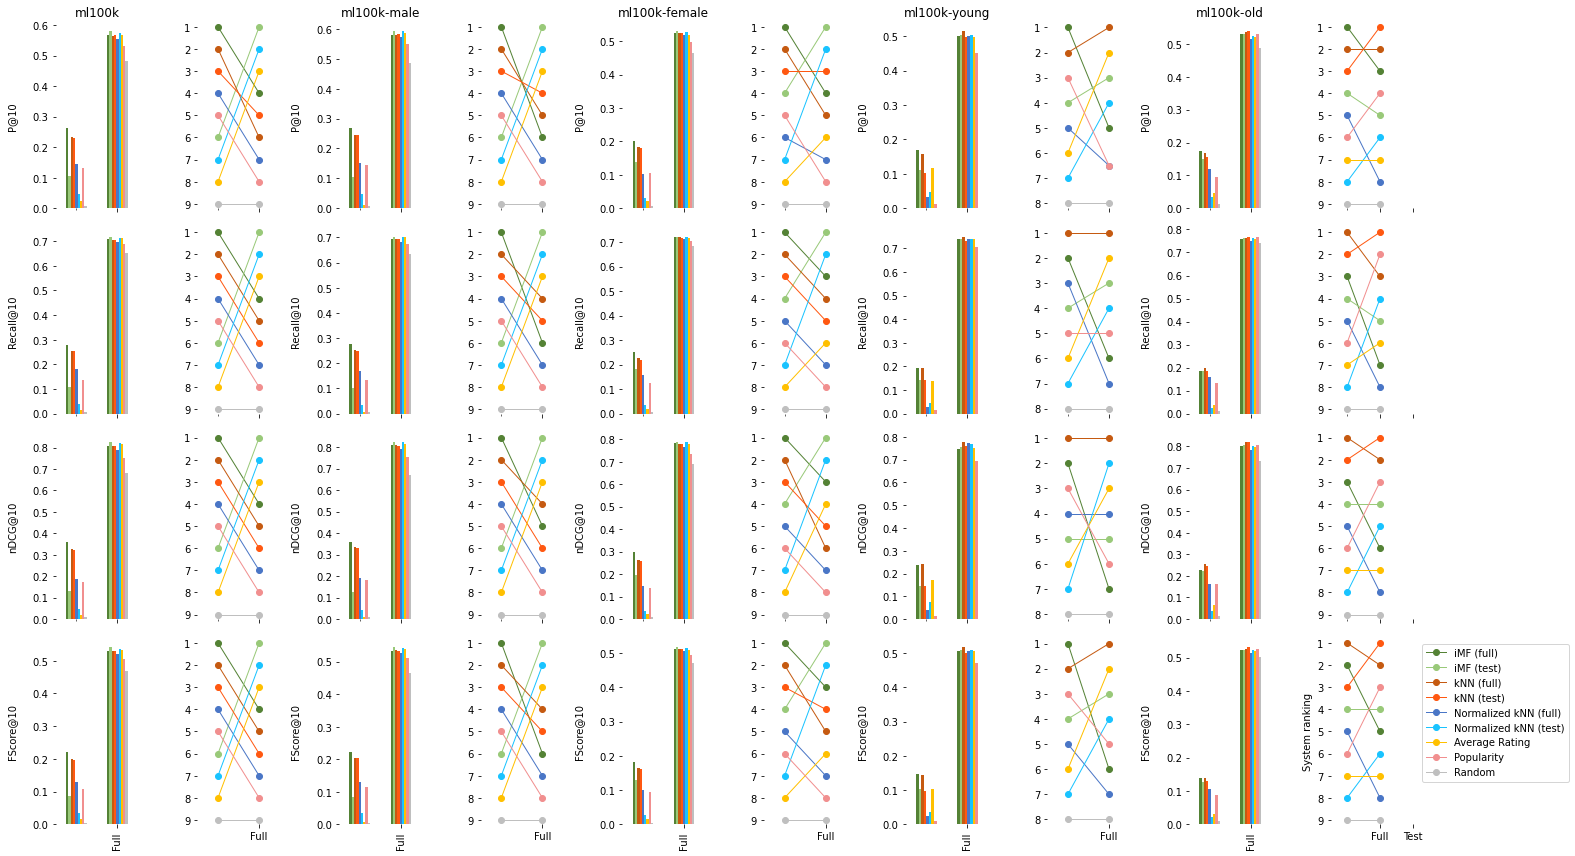

In [7]:
def fig111(data=None, legend=False, title="", ax1=None, ax2=None):
    # pp.pprint(data)
    f1 = np.array(data)

    df1 = pd.DataFrame(data=f1.T[1:], columns=f1.T[0], index=["Full", "Test"])
    ax11 = df1.plot(
        kind="bar",
        color=rec_colors,
        legend=None,
        ax=ax1,
        ylabel=title,
    )

    linedata = np.array(
        [
            fig1.Recommender,
            data.Full.rank(ascending=False),
            data.Test.rank(ascending=False),
        ]
    ).T
    artists = []
    for row in linedata:
        # pp.pprint([row[0], row[1:], color, rec_colors_dict[row[0]]])
        artist = plt.Line2D(
            xdata=[0, 1],
            ydata=row[1:],
            lw=1,
            color=rec_colors_dict[row[0]],
            marker="o",
        )
        artists.append(artist)
        ax2.add_artist(artist)

    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    
    ax2.set_ybound([0.8, len(artists) + 0.2])
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    ax2.spines["bottom"].set_visible(False)
    ax2.spines["left"].set_visible(False)
    ax2.invert_yaxis()

    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(["Full", "Test"])

    plt.ylabel("System ranking")
    if legend:
        plt.legend(
            artists,
            data.Recommender,
            bbox_to_anchor=(1.05, 1),
            loc="upper left",
            # title="Recommender",
            title_fontsize="xx-large",
        )


datasets = ["ml1m", "ml100k"]
splits = ["", "-male", "-female", "-young", "-old"]
# splits = ["", "-male", "-female"]
# splits = ["","-young", "-old"]

for dataset in datasets:
    columns = len(datasets) * len(splits)
    fig, axes = plt.subplots(4, columns, sharex="row")
    i = 0
    for split in splits:

        file = os.path.join(
            r"C:\Projects\RecSys2020\results", "figure101." + dataset + split + ".txt"
        )
        print(file)
        lines_with_metrics = [
            (i, linecache.getline(file, i + 1))
            for i, line in enumerate(open(file))
            if line.endswith("@10\n")
        ]
        # print(lines_with_metrics)
        rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3
        params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)
        axes[0, 0 + i].set_title(dataset + split)

        for j, metric in enumerate(lines_with_metrics):
            metric_name = metric[1]
            metric_line = metric[0]
            fig1 = pd.read_table(header=metric_line - j, **params)
            # pp.pprint([dataset, split, metric_name, metric_line, fig1])
            fig111(
                data=fig1,
                title=metric_name,
                ax1=axes[j, 0 + i],
                ax2=axes[j, 1 + i],
                legend=True,
            )
        i = i + 2

        # plt.suptitle(dataset + split)
    fig.set_size_inches(22, 12)
    fig.tight_layout()
    png = os.path.join(
        r"C:\Projects\RecSys2020\results\_mbd", "figure101." + dataset + ".png"
    )
    fig.savefig(png, format="png", dpi=300)

plt.show()

In [6]:
data = fig1
f1 = np.array(data)

df1 = pd.DataFrame(data=f1.T[1:], columns=f1.T[0], index=["Full", "Test"])

linedata = np.array(
    [fig1.Recommender, data.Full.rank(ascending=False), data.Test.rank(ascending=False)]
).T
artists = []
for row, color in zip(linedata, rec_colors):
    pp.pprint([row[0], row[1:], color, rec_colors_dict[row[0]]])

['iMF (full)', array([2.0, 5.0], dtype=object), '#548235', '#548235']
['iMF (test)', array([4.0, 4.0], dtype=object), '#99C979', '#99C979']
['kNN (full)', array([1.0, 2.0], dtype=object), '#C55A11', '#C55A11']
['kNN (test)', array([3.0, 1.0], dtype=object), '#ff5811', '#ff5811']
['Normalized kNN (full)', array([5.0, 8.0], dtype=object), '#4A76C6', '#4A76C6']
['Normalized kNN (test)', array([8.0, 6.0], dtype=object), '#19C3FF', '#19C3FF']
['Average Rating', array([7.0, 7.0], dtype=object), '#FFC000', '#FFC000']
['Popularity', array([6.0, 3.0], dtype=object), '#F18F8F', '#F18F8F']
['Random', array([9.0, 9.0], dtype=object), '#BFBFBF', '#BFBFBF']
